In [15]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pandas.read_csv("~/Desktop/avocado.csv")
df.columns


Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [3]:
df['Date'] = pandas.to_datetime(df['Date'])
df['region']

0                  Albany
1                  Albany
2                  Albany
3                  Albany
4                  Albany
               ...       
18244    WestTexNewMexico
18245    WestTexNewMexico
18246    WestTexNewMexico
18247    WestTexNewMexico
18248    WestTexNewMexico
Name: region, Length: 18249, dtype: object

In [4]:
albany = df[df['region']=='Albany']
albany

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17608,7,2018-02-04,1.52,4124.96,118.38,420.36,0.00,3586.22,3586.22,0.00,0.0,organic,2018,Albany
17609,8,2018-01-28,1.32,6987.56,433.66,374.96,0.00,6178.94,6178.94,0.00,0.0,organic,2018,Albany
17610,9,2018-01-21,1.54,3346.54,14.67,253.01,0.00,3078.86,3078.86,0.00,0.0,organic,2018,Albany
17611,10,2018-01-14,1.47,4140.95,7.30,301.87,0.00,3831.78,3831.78,0.00,0.0,organic,2018,Albany


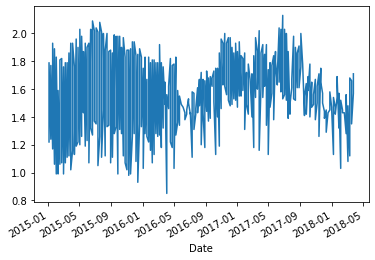

In [5]:

albany.set_index('Date',inplace=True)
albany['AveragePrice'].plot()

<ipython-input-6-dd72b3e7ceed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  albany.sort_index(inplace=True)


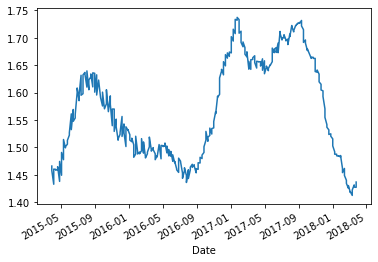

In [6]:
albany.sort_index(inplace=True)
albany['AveragePrice'].rolling(25).mean().plot()

In [7]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [8]:
gps = albany.groupby('type')

gps.get_group('organic').AveragePrice.rolling(4).mean()

Date
2015-01-04       NaN
2015-01-11       NaN
2015-01-18       NaN
2015-01-25    1.8450
2015-02-01    1.8550
               ...  
2018-02-25    1.4850
2018-03-04    1.4750
2018-03-11    1.5375
2018-03-18    1.5950
2018-03-25    1.6325
Name: AveragePrice, Length: 169, dtype: float64

In [18]:
corr_df = df.corr()
corr_df

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


In [22]:
df_2 =pandas.read_csv("~/Desktop/minwg.csv",encoding="latin")
df_2.to_csv("~/Desktop/minwg.csv", encoding="utf-8")
df_2 = pandas.read_csv("~/Desktop/minwg.csv")


In [26]:
min_wage = pandas.DataFrame()

for name, group in df_2.groupby("State"):
    if min_wage.empty:
        min_wage = group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name})
    else:
        min_wage = min_wage.join(group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name}))

min_wage.head()


,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.12,3.37,1.12,11.88,7.20,10.08,9.00,9.00,8.28,...,0.0,0.00,NaN,7.20,10.08,0.0,11.52,7.20,9.00,8.64
1969,0.0,14.33,3.19,1.07,11.26,6.83,9.56,8.53,8.53,7.85,...,0.0,0.00,NaN,6.83,9.56,0.0,10.92,6.83,8.53,8.19
1970,0.0,13.54,3.02,7.09,10.64,6.45,10.32,8.06,10.32,8.38,...,0.0,0.00,NaN,6.45,10.32,0.0,10.32,6.45,8.38,8.38
1971,0.0,12.99,2.89,6.80,10.20,6.18,9.89,7.73,9.89,8.04,...,0.0,0.00,NaN,6.18,9.89,0.0,9.89,6.18,8.04,8.04
1972,0.0,12.57,2.80,7.19,9.88,5.99,11.08,9.58,9.58,9.58,...,0.0,8.38,NaN,7.19,9.58,0.0,9.58,7.19,8.68,8.98


[Text(0, 0, 'Un'),
 Text(0, 0, 'Un'),
 Text(0, 0, 'Un'),
 Text(0, 0, 'Ye'),
 Text(0, 0, 'Hi'),
 Text(0, 0, 'Lo'),
 Text(0, 0, 'CP'),
 Text(0, 0, 'Hi'),
 Text(0, 0, 'Lo')]

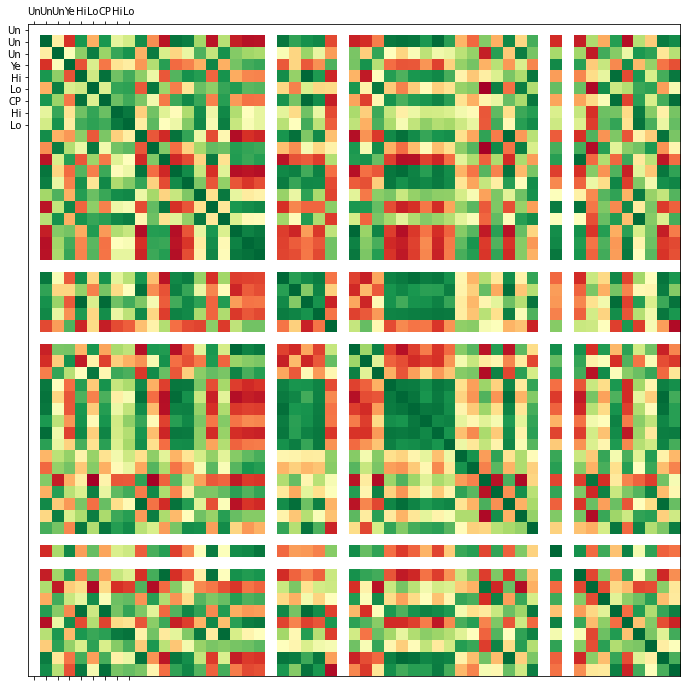

In [28]:

min_wage = min_wage.corr()
labels = [c[:2] for c in df_2_corr.columns] 

fig = plt.figure(figsize=(12,12)) 
ax = fig.add_subplot(111)  
ax.matshow(min_wage, cmap=plt.cm.RdYlGn)  
ax.set_xticks(np.arange(len(labels))) 
ax.set_yticks(np.arange(len(labels)))  
ax.set_xticklabels(labels)  
ax.set_yticklabels(labels)  